# **Import the necessary libraries and load the dataset.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [393]:
df=pd.read_csv('Mall_Customers.csv')

# **Preprocess and analyze the dataset.**

In [394]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [396]:
df.duplicated().sum()

np.int64(0)

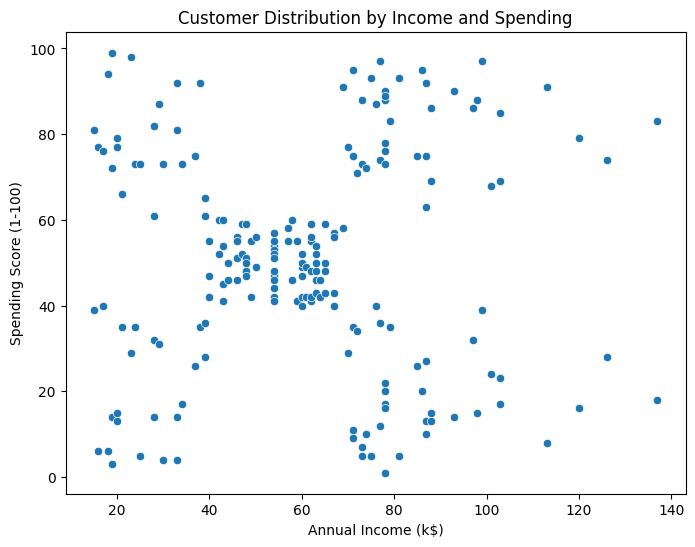

In [397]:
# Exploratory Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.title('Customer Distribution by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# **Use Elbow method to find optimal K.**

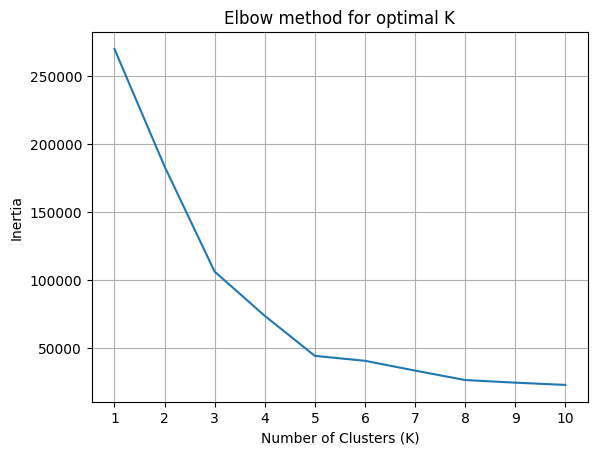

In [398]:
cluster = df.iloc[:,[3,4]].values
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster)

  wcss.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.grid(True)
plt.xticks(range(1,11))
plt.show()

# **Use Isolation Forest to identify  outliers.**

In [399]:
from sklearn.ensemble import IsolationForest
# Use Isolation Forest to identify potential outliers in the data and create a cleaned dataset by removing them
iso = IsolationForest(contamination=0.07, random_state=42)
outliers = iso.fit_predict(cluster)
X_cleaned = cluster[outliers == 1]  # Keep only inliers


# **Train the model using K-means**

In [400]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_cleaned)
print(np.unique(Y)) # Stores cluster label to Y

[0 1 2 3 4]


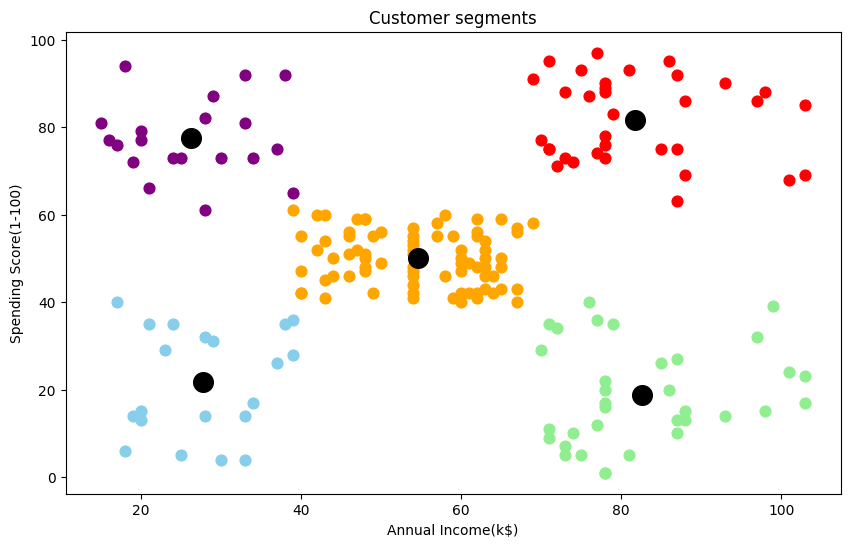

In [401]:
# Create scatterplot for each of the five clusters with colour coding
plt.figure(figsize=(10,6))
plt.scatter(X_cleaned[Y==0,0], X_cleaned[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(X_cleaned[Y==1,0], X_cleaned[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(X_cleaned[Y==2,0], X_cleaned[Y==2,1], s=60, c='purple', label='Cluster 3')
plt.scatter(X_cleaned[Y==3,0], X_cleaned[Y==3,1], s=60, c='lightgreen', label='Cluster 4')
plt.scatter(X_cleaned[Y==4,0], X_cleaned[Y==4,1], s=60, c='skyblue', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('Customer segments')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# **Evaluate the model using appropriate metrics.**

In [402]:
# Evaluate with Silhouette Score
silhouette_avg = silhouette_score(X_cleaned, Y)
print(f"Silhouette Score: {silhouette_avg}")
# Usually a sil_score > 0.5 indicates good structure and a sil_score > 0.7 indicates excellant structure

Silhouette Score: 0.5732626390141412


In [403]:
# Try silhouette score for K=3 to K=9, for example
for k in range(3, 9):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_cleaned)
    score = silhouette_score(X_cleaned, labels)
    print(f"K={k} → Silhouette Score: {score:.3f}")


K=3 → Silhouette Score: 0.471
K=4 → Silhouette Score: 0.508
K=5 → Silhouette Score: 0.573
K=6 → Silhouette Score: 0.534
K=7 → Silhouette Score: 0.495
K=8 → Silhouette Score: 0.432
